In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

### Number of Registers to Hide Memory Latency

using larger memories with higher latency requires more matrix registers to acheive high utilization. below is a plot showing how utilization is affected by memory latency for different matrix register counts.

100%|██████████| 100/100 [00:00<00:00, 1397.84it/s]


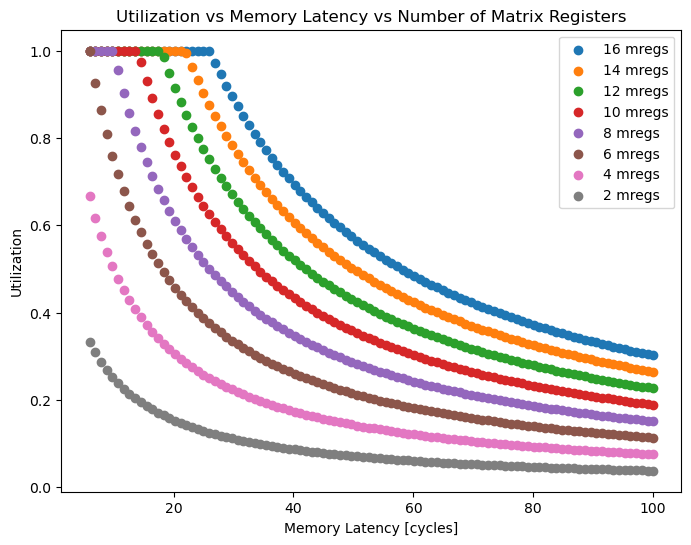

In [2]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Utilization vs Memory Latency vs Number of Matrix Registers')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Utilization')

level = 1
databits = np.array([32])
slice_values = np.linspace(6, 100, 100)
num_mregs = np.array(range(16, 0, -2))
for n in num_mregs:
    perf_model = fmodel.init_pm(databits, t_mem=slice_values, num_mregs=np.array([n]))

    x = perf_model.index.levels[level]
    y = perf_model['util']
    scatter = axs.scatter(x, y, label=f'{n} mregs')
    axs.legend()

100%|██████████| 100/100 [00:00<00:00, 1243.58it/s]
/var/folders/hc/58trqhn5091504q0fyxy68jc0000gn/T/ipykernel_32972/839808576.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axs.scatter(x, y, cmap='viridis', s=100)


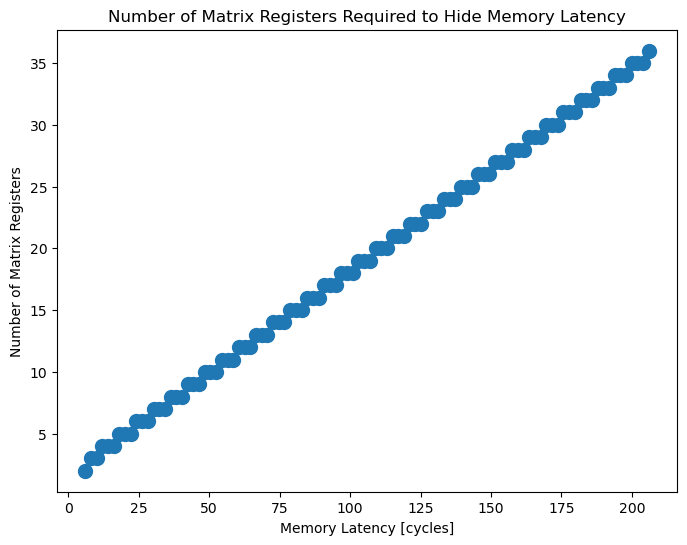

In [3]:
level = 1
slice_values = np.linspace(6,206,100)
perf_model = fmodel.init_pm(t_mem=slice_values)

fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Number of Matrix Registers Required to Hide Memory Latency')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Number of Matrix Registers')

x = perf_model.index.levels[level]
y = perf_model['max_mregs']
scatter = axs.scatter(x, y, cmap='viridis', s=100)

100%|██████████| 100/100 [00:00<00:00, 1309.93it/s]


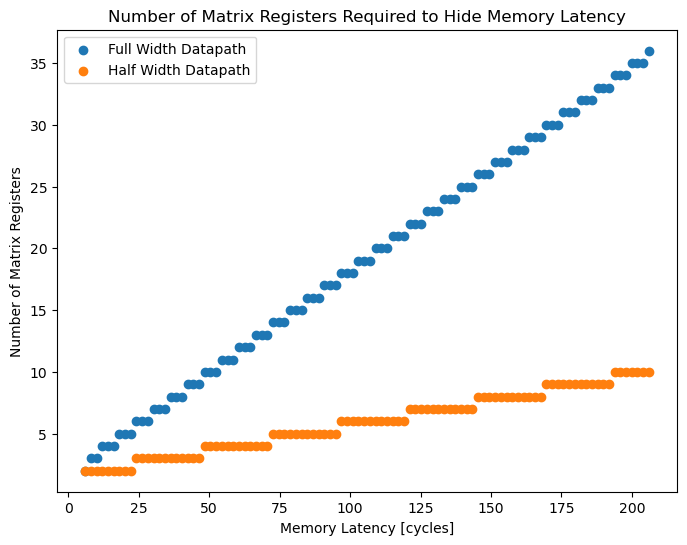

In [4]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Number of Matrix Registers Required to Hide Memory Latency')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Number of Matrix Registers')
scatter = axs.scatter(x, y, label='Full Width Datapath')

level = 1
slice_values = np.linspace(6,206,100)
perf_model = fmodel.init_pm(t_mem=slice_values,width_mmu=np.array([0.5]))

x = perf_model.index.levels[level]
y = perf_model['max_mregs']
scatter = axs.scatter(x, y, label='Half Width Datapath')
axs.legend()

### Exploring Design Space

The model can be used to sweep ranges of the input parameters, and the output performance specs can be visualized using pareto-optimal curves.

With these plots we can visualize the tradeoffs between ngates capacity, memory bandwidth, and performance (operations per cycle).

100%|██████████| 36864/36864 [00:27<00:00, 1350.53it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu          
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5        120.0   
                     20 256      1  16.0 16.0 2         0    1.0         68.0   
                                              4         0    0.5        152.0   
                                                             1.0         68.0   
                     28 256      1  16.0 16.0 2         0    1.0         76.0   
...                                                                       ...   
               60 60 60 256      1  32.0 64.0 4         0    0.5        408.0   
                                                        2    0.5        280.0   
                                    64.0 32.0 4         0    0.5        344.0   
                                         64.0 4         0    0.5        408.0   
                                                        2    0.5        280.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5        0.400000   
                     20 256      1  16.0 16.0 2         0    1.0        0.588235   
                                              4         0    0.5        0.526316   
                                                             1.0        1.000000   
                     28 256      1  16.0 16.0 2         0    1.0        0.736842   
...                                                                          ...   
               60 60 60 256      1  32.0 64.0 4         0    0.5        0.517004   
                                                        2    0.5        0.753348   
                                    64.0 32.0 4         0    0.5        0.613190   
                                         64.0 4         0    0.5        0.517004   
                                                        2    0.5        0.753348   

                                                                         ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5         25.600000   
                     20 256      1  16.0 16.0 2         0    1.0         37.647059   
                                              4         0    0.5         33.684211   
                                                             1.0         64.000000   
                     28 256      1  16.0 16.0 2         0    1.0         47.157895   
...                                                                            ...   
               60 60 60 256      1  32.0 64.0 4         0    0.5        264.705882   
                                                        2    0.5        385.714286   
                                    64.0 32.0 4         0    0.5        313.953488   
                                         64.0 4         0    0.5        529.411765   
                                                        2    0.5        771.428571   

                                                                        max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4  4  12 256      1  16.0 16.0 4         0    0.5              2.0   
                     20 256      1  16.0 16.0 2         0    1.0              3.0   
                                              4         0    0.5              2.0   
                                                             1.0              3.0   
                     28 256      1  16.0 16.0 2         0    1.0              3.0   
...                                                                           ...   
               60 60 60 256      1  32.0 64.0 4         0    0.5              2.0   
                                          

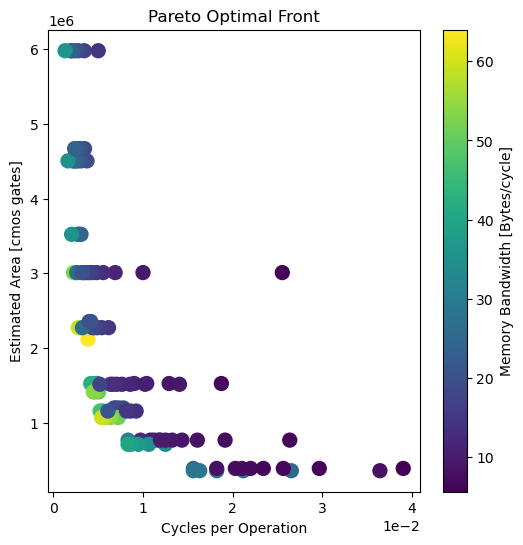

In [5]:
perf_model = fmodel.init_pm(
    # mlB = np.array(range(128,513, 32))/8,
    mlB = np.array([128, 256, 512])/8,
    vlB = np.array([128, 256, 512])/8,
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    num_mregs = np.array(range(2,6,2)),
    t_op = np.array([0, 2]),
    width_mmu = np.array([0.5, 1])
)
perf_model = perf_model[perf_model['max_mem_bw'] <= 64]
perf_model = perf_model[perf_model['ops_cycle'] >= 1/4e-2]

pm_pareto = perf_model[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model.loc[mask,'max_mem_bw']
ngates = perf_model.loc[mask,'opu_gates']
opc = perf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
perf_model[mask]

t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu          
32       20    4  4  12 256      1  16.0 16.0 2         0    1.0         60.0   
                                                        2    1.0         52.0   
                                              4         0    0.5        120.0   
                                                             1.0         60.0   
                                                        2    0.5         88.0   
...                                                                       ...   
               60 60 60 256      1  64.0 32.0 4         2    0.5        280.0   
                                         64.0 2         0    0.5        408.0   
                                                        2    0.5        280.0   
                                              4         0    0.5        408.0   
                                                        2    0.5        280.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
32       20    4  4  12 256      1  16.0 16.0 2         0    1.0        0.400000   
                                                        2    1.0        0.461538   
                                              4         0    0.5        0.400000   
                                                             1.0        0.800000   
                                                        2    0.5        0.545455   
...                                                                          ...   
               60 60 60 256      1  64.0 32.0 4         2    0.5        0.753348   
                                         64.0 2         0    0.5        0.258502   
                                                        2    0.5        0.376674   
                                              4         0    0.5        0.517004   
                                                        2    0.5        0.753348   

                                                                         ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
32       20    4  4  12 256      1  16.0 16.0 2         0    1.0         25.600000   
                                                        2    1.0         29.538462   
                                              4         0    0.5         25.600000   
                                                             1.0         51.200000   
                                                        2    0.5         34.909091   
...                                                                            ...   
               60 60 60 256      1  64.0 32.0 4         2    0.5        385.714286   
                                         64.0 2         0    0.5        264.705882   
                                                        2    0.5        385.714286   
                                              4         0    0.5        529.411765   
                                                        2    0.5        771.428571   

                                                                        max_mregs  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu              
32       20    4  4  12 256      1  16.0 16.0 2         0    1.0              3.0   
                                                        2    1.0              5.0   
                                              4         0    0.5              2.0   
                                                             1.0              3.0   
                                                        2    0.5              2.0   
...                                                                           ...   
               60 60 60 256      1  64.0 32.0 4         2    0.5              2.0   
                                         6

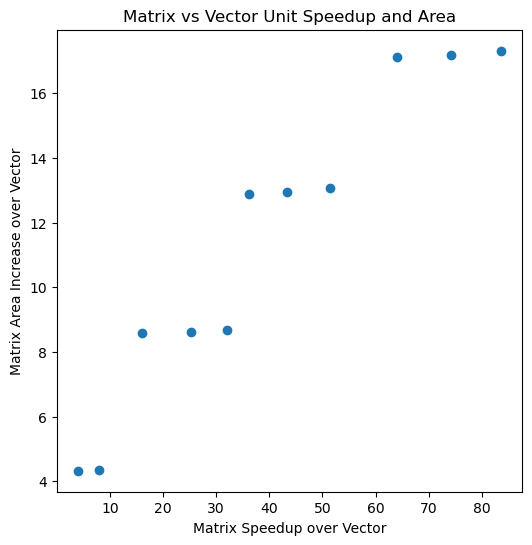

In [27]:
pm_pareto = perf_model[['speedup_vec','gates_vec']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

speedup_vec = perf_model.loc[mask, 'speedup_vec']
gates_vec = perf_model.loc[mask, 'gates_vec']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Matrix vs Vector Unit Speedup and Area')
axs.set_xlabel('Matrix Speedup over Vector')
axs.set_ylabel('Matrix Area Increase over Vector')

scatter = axs.scatter(speedup_vec, gates_vec)
perf_model

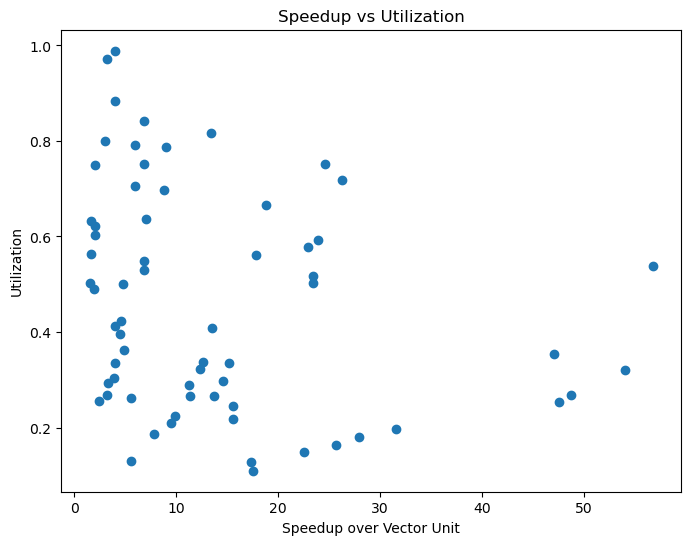

,vlB,mlB,num_mregs,t_op,width_mmu,util,speedup_vec
0,16.0,16.0,2,0,1.0,0.791249,5.918892
1,16.0,16.0,2,2,0.5,0.411660,4.010800
2,16.0,16.0,2,2,1.0,0.842729,6.795017
3,16.0,16.0,4,0,0.5,0.631920,1.579649
4,16.0,16.0,4,0,1.0,0.971429,3.172643
...,...,...,...,...,...,...,...
60,64.0,64.0,2,0,1.0,0.147960,22.538555
61,64.0,64.0,2,2,0.5,0.253051,47.533587
62,64.0,64.0,4,0,0.5,0.322242,12.344105
63,64.0,64.0,4,0,1.0,0.289145,11.232513


In [7]:
# Group by M, N, K and find the maximum speedup_vec for each group
avg_nmk = perf_model.groupby(['vlB', 'mlB', 'num_mregs', 't_op', 'width_mmu'])['util'].mean().reset_index()
avg_speedup = perf_model.groupby(['vlB', 'mlB', 'num_mregs', 't_op', 'width_mmu'])['speedup_vec'].mean().reset_index()
avg_nmk['speedup_vec'] = avg_speedup['speedup_vec']

pm_pareto = avg_nmk[['speedup_vec','util']]
mask = paretoset(pm_pareto, sense=['max', 'max'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Speedup vs Utilization')
axs.set_xlabel('Speedup over Vector Unit')
axs.set_ylabel('Utilization')

scatter = axs.scatter(avg_nmk['speedup_vec'], avg_nmk['util'])
plt.show()
# Write the output to a file
with open('avg_nmk.txt', 'w') as f:
    sorted = avg_nmk.sort_values(by='speedup_vec', ascending=False)
    f.write(sorted.to_string())
avg_nmk

/var/folders/hc/58trqhn5091504q0fyxy68jc0000gn/T/ipykernel_32972/610245788.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(x_labels, rotation=90)


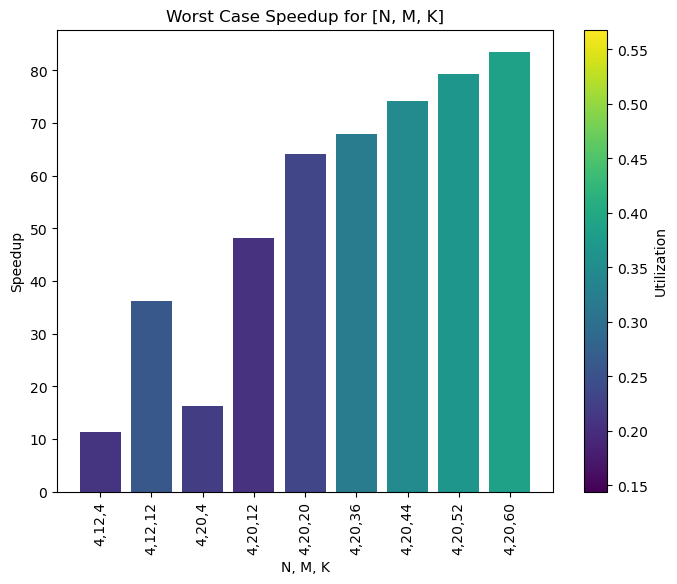

t_uk      util   ops_cycle  max_mregs  max_mrf_capacity  \
M  N K  vlB  mlB                                                              
12 4 4  16.0 64.0   52.0  0.153846   29.538462        5.0          1.328125   
     12 16.0 64.0   88.0  0.272727   52.363636        2.0          0.531250   
20 4 4  16.0 64.0   56.0  0.178571   45.714286        4.0          1.312500   
     12 16.0 64.0  104.0  0.144231   36.923077        2.0          0.656250   
     20 16.0 64.0  120.0  0.208333   53.333333        2.0          0.656250   
     36 16.0 64.0  108.0  0.416667  106.666667        2.0          0.656250   
     44 16.0 64.0  116.0  0.474138  121.379310        2.0          0.656250   
     52 16.0 64.0  124.0  0.524194  134.193548        2.0          0.656250   
     60 16.0 64.0  132.0  0.568182  145.454545        2.0          0.656250   

                      mem_bw  max_mem_bw  mrf_capacity     mrf_bw  \
M  N K  vlB  mlB                                                    
12 4 4  16.0 64.0  16.000000   42.666667       0.53125  96.000000   
     12 16.0 64.0  18.000000   24.000000       0.53125  84.000000   
20 4 4  16.0 64.0  37.000000   36.000000       1.31250  96.000000   
     12 16.0 64.0  20.500000   19.000000       0.65625  84.000000   
     20 16.0 64.0  25.200000   23.200000       0.65625  83.200000   
     36 16.0 64.0  50.352941   46.117647       0.65625  83.764706   
     44 16.0 64.0  54.315789   49.684211       0.65625  83.368421   
     52 16.0 64.0  57.523810   52.571429       0.65625  83.047619   
     60 16.0 64.0  60.173913   54.956522       0.65625  82.782609   

                   speedup_vec  gates_vec  macc_gates  mrf_gates  opu_gates  \
M  N K  vlB  mlB                                                              
12 4 4  16.0 64.0    11.307692    13.0625    983040.0    87040.0  1070080.0   
     12 16.0 64.0    36.125000    13.0625    983040.0    87040.0  1070080.0   
20 4 4  16.0 64.0    16.250000    18.6250   1310720.0   215040.0  1525760.0   
     12 16.0 64.0    48.125000    17.3125   1310720.0   107520.0  1418240.0   
     20 16.0 64.0    64.100000    17.3125   1310720.0   107520.0  1418240.0   
     36 16.0 64.0    67.882353    17.3125   1310720.0   107520.0  1418240.0   
     44 16.0 64.0    74.210526    17.3125   1310720.0   107520.0  1418240.0   
     52 16.0 64.0    79.333333    17.3125   1310720.0   107520.0  1418240.0   
     60 16.0 64.0    83.565217    17.3125   1310720.0   107520.0  1418240.0   

                   insts_cycle  NM_NK_MK  
M  N K  vlB  mlB                          
12 4 4  16.0 64.0     0.076923       112  
     12 16.0 64.0     0.125000       240  
20 4 4  16.0 64.0     0.062500       176  
     12 16.0 64.0     0.093750       368  
     20 16.0 64.0     0.125000       560  
     36 16.0 64.0     0.264706       944  
     44 16.0 64.0     0.289474      1136  
     52 16.0 64.0     0.309524      1328  
     60 16.0 64.0     0.326087      1520

In [8]:
# Calculate the new variable (N*M + N*K + M*K)
perf_model['NM_NK_MK'] = perf_model.index.get_level_values('N') * perf_model.index.get_level_values('M') + \
                         perf_model.index.get_level_values('N') * perf_model.index.get_level_values('K') + \
                         perf_model.index.get_level_values('M') * perf_model.index.get_level_values('K')

pm_pareto = perf_model[['NM_NK_MK', 'speedup_vec']]
mask = paretoset(pm_pareto, sense=['min', 'max'])

# Plot speedup vs (N*M + N*K + M*K)
fig, axs = plt.subplots(figsize=(8, 6))
axs.set_title('Worst Case Speedup for [N, M, K]')
axs.set_xlabel('N, M, K')
axs.set_ylabel('Speedup')

# Create a bar plot with x-axis as the combination of N, M, and K
x_labels = [f'{n},{m},{k}' for n, m, k in zip(perf_model.loc[mask].index.get_level_values('N'), 
                                              perf_model.loc[mask].index.get_level_values('M'), 
                                              perf_model.loc[mask].index.get_level_values('K'))]

speedup = perf_model.loc[mask, 'speedup_vec']
utilization = perf_model.loc[mask, 'util']
scatter = axs.bar(x_labels, speedup, color=plt.cm.viridis(utilization))
axs.set_xticklabels(x_labels, rotation=90)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=utilization.min(), vmax=utilization.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('Utilization')
plt.show()
perf_model.loc[mask].reset_index(level=['databits', 't_mem', 'l2_cache', 'kl', 'num_mregs', 't_op', 'width_mmu'], drop=True)